In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy
from scipy.optimize import curve_fit

import jaqalpaq
from jaqalpaq.parser import parse_jaqal_file
from jaqalpaq.emulator import run_jaqal_circuit

from noisy import JaqalNoisyEmulator

mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'

Simulation results are in `all_results.csv`. Simulations were performed by passing each of the RAV and XEB sequences under `sequences/` to the JAQAL emulator as follows:

```
# jaqal_string contains the file contents as a string
depolarizations = np.geomspace(1e-4, 5e-2, 15)
for depol in depolarizations:
    noisy_backend = JaqalNoisyEmulator(
       n_qubits=5,
       depolarization=depol)
    jaqal_circuit = parse_jaqal_string(jaqal_string)
    jaqal_circuit_results = run_jaqal_circuit(
        jaqal_circuit,
        backend=noisy_backend)
```

Code which calculates the RAV and XEB fidelities from the simulation results can be found in the notebook for [Figure 5](../fig5/fig5.ipynb).

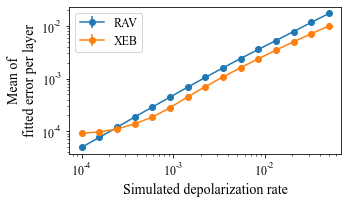

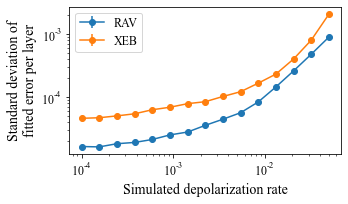

In [2]:
df = pd.read_csv('data/simulation_results/all_results.csv')

x = df['depolarization error'].unique()

plt.figure(figsize=(5,3))
y_rav = [df[df['depolarization error'] == x_val]['mean RAV'].mean() for x_val in x]
yerr_rav = [df[df['depolarization error'] == x_val]['mean RAV'].sem() for x_val in x]
y_xeb = [df[df['depolarization error'] == x_val]['mean XEB'].mean() for x_val in x]
yerr_xeb = [df[df['depolarization error'] == x_val]['mean XEB'].sem() for x_val in x]
plt.errorbar(x, y_rav, yerr=yerr_rav, marker='o', linestyle='-')
plt.errorbar(x, y_xeb, yerr=yerr_xeb, marker='o', linestyle='-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Simulated depolarization rate', fontsize=14)
plt.ylabel('Mean of\nfitted error per layer', fontsize=14)
plt.legend(['RAV','XEB'])
plt.tight_layout()
plt.savefig("fig7a.pdf", format='pdf')
plt.show()

plt.figure(figsize=(5,3))
y_rav = [df[df['depolarization error'] == x_val]['STDEV RAV'].mean() for x_val in x]
yerr_rav = [df[df['depolarization error'] == x_val]['STDEV RAV'].sem() for x_val in x]
y_xeb = [df[df['depolarization error'] == x_val]['STDEV XEB'].mean() for x_val in x]
yerr_xeb = [df[df['depolarization error'] == x_val]['STDEV XEB'].sem() for x_val in x]
plt.errorbar(x, y_rav, yerr=yerr_rav, marker='o', linestyle='-')
plt.errorbar(x, y_xeb, yerr=yerr_xeb, marker='o', linestyle='-')
plt.yscale('log')
plt.xscale('log')
plt.legend(['RAV','XEB'])
plt.xlabel('Simulated depolarization rate', fontsize=14)
plt.ylabel('Standard deviation of\nfitted error per layer', fontsize=14)
plt.tight_layout()
plt.savefig("fig7b.pdf", format='pdf')
plt.show()